<a href="https://colab.research.google.com/github/LeTienNhan20104048/LeTienNhan20104048/blob/main/Tuan10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [84]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [87]:
x_train.shape

(60000, 28, 28)

In [88]:
y_train.shape

(60000,)

In [89]:
x_test.shape

(10000, 28, 28)

In [90]:
y_test.shape

(10000,)

In [91]:
from keras.layers.serialization import activation
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Input
from keras.layers import Conv2D,MaxPooling2D

In [92]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [93]:
from keras.layers.convolutional.conv2d_transpose import Conv2D
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same'))

In [94]:
model.add(MaxPooling2D((2,2),padding='same'))

In [95]:
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))

In [96]:
model.add(MaxPooling2D((2,2),padding='same'))

In [97]:
model.add(Flatten())

In [98]:
model.add(Dense(128,activation='relu'))

In [99]:
model.add(Dense(10,activation='softmax'))

In [100]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 3136)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [101]:
model.compile(optimizer='adam',loss='categorical_crossentropy' , metrics= 'accuracy' )
history=model.fit(x_train,y_train,epochs=20,batch_size=128,verbose=2)

Epoch 1/20
469/469 - 40s - loss: 0.7490 - accuracy: 0.9319 - 40s/epoch - 85ms/step
Epoch 2/20
469/469 - 40s - loss: 0.0589 - accuracy: 0.9817 - 40s/epoch - 85ms/step
Epoch 3/20
469/469 - 39s - loss: 0.0407 - accuracy: 0.9872 - 39s/epoch - 83ms/step
Epoch 4/20
469/469 - 39s - loss: 0.0321 - accuracy: 0.9897 - 39s/epoch - 83ms/step
Epoch 5/20
469/469 - 39s - loss: 0.0259 - accuracy: 0.9920 - 39s/epoch - 83ms/step
Epoch 6/20
469/469 - 39s - loss: 0.0203 - accuracy: 0.9935 - 39s/epoch - 83ms/step
Epoch 7/20
469/469 - 39s - loss: 0.0191 - accuracy: 0.9937 - 39s/epoch - 83ms/step
Epoch 8/20
469/469 - 40s - loss: 0.0176 - accuracy: 0.9941 - 40s/epoch - 85ms/step
Epoch 9/20
469/469 - 39s - loss: 0.0168 - accuracy: 0.9942 - 39s/epoch - 83ms/step
Epoch 10/20
469/469 - 39s - loss: 0.0186 - accuracy: 0.9937 - 39s/epoch - 83ms/step
Epoch 11/20
469/469 - 39s - loss: 0.0158 - accuracy: 0.9952 - 39s/epoch - 83ms/step
Epoch 12/20
469/469 - 39s - loss: 0.0140 - accuracy: 0.9954 - 39s/epoch - 83ms/step
E

In [102]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0762 - accuracy: 0.9869
Test accuracy: 0.9868999719619751


1/1 [==============================] - 0s 14ms/step
Day la so: 2


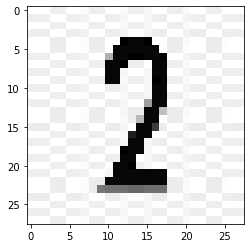

In [120]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/2.png',target_size=(28,28))
plt.imshow(img)
img = img_to_array(img)
img = img[:,:,0]
img = img.astype('float32')
img = img.reshape(1,28,28,1)
img = img/255
class_number=['1','2','3','4','5','6','7','8','9','0']
a= int(np.argmax(model.predict(img),axis=1))
print("Day la so:", class_number[a])